<a href="https://colab.research.google.com/github/R-A-N-N/Final-Year-Project/blob/main/Twitter_Problem_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Authentication

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
  import os
import tweepy as tw
from time import sleep
import pandas as pd
import csv 
import re 
import string

In [4]:
consumer_key= 'qc8vFuKFgGzcoxbhAkREHxRoE'
consumer_secret= 'ui2u5ZnJYLPtBrTNMreRGIeRZBLwGoF1W9XPmdYvSVofWg6o6A'
access_token= '1429353996188196876-CBoTpX136goMmypFtgTk2WO4sqH0ZC'
access_token_secret= '2ETqV9DxxdlVqMEEDw9A9kbY2Dy4L4rtlOlpuAoVYuEXl'

#please copy paste all the keys which are pinned on our discord server in back-end channel 

In [5]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

#Method 1 - Extraction

In [6]:
# Define the search term and the date_since date as variables
file = csv.reader(open('/content/drive/MyDrive/Twitter Problem Detection/GeoNames.csv'), delimiter=',')
for line in file:
    # print(line)
    str1 = ""
    for ele in line: 
        str1 += ele
    str1 + ", Thane"
    search_words = str1
    # print(search_words)
    date_since = "2000-01-01"
    # Collect tweets
    tweets = tw.Cursor(api.search,
                  q=search_words,
                  lang="en",
                  since=date_since).items(5)
    tweets
    # Iterate and print tweets
    for tweet in tweets:
        print(tweet.text)


@AmitShahOffice my country only for bhrashtachar bhrashtachar and it officer and doctors BJP Mahapur mahapaur Uttar… https://t.co/RIVCp9s4dt
RT @ChennaiIPL: Super Sunday begins with a Medal lift for 🇮🇳!

🥇 Krishna Nagar
🥈 Suhas Yathiraj

#Paralympics #WhistleforIndia #Yellove 🦁💛…
@TMCaTweetAway @TMCsmartcity @nareshmhaske Please repair Waghbil road at the earliest. A stretch between Anu Nagar… https://t.co/xIhWdi9DHm
RT @Uppolice: Proud moment for UP- Congratulations Suhas LY, for the ‘Badminton Blitzkrieg’ &amp; entry into the finals of the Men's Singles SL…
@seemabhupinderm mr bhupinder malik and Seema ji ur number blocked by society people and these policemens whom u tr… https://t.co/Gn1ibMx4By
Could you please let us know the reason why gates get closed after 2pm on the East Azad Nagar and Krishna Nagar Met… https://t.co/JDlL54takv
Not a single street lights are working. 

Samrat Ashok Buddh Vihar, Azad Nagar, Ghatkopar West, Mumbai 400086.… https://t.co/m59sF3ma6z
RT @BZZameerAhme

#Method 2 - Extraction

In [7]:
csvFile = open('Tweets.csv', 'a')
csvWriter = csv.writer(csvFile)


file = csv.reader(open('/content/drive/MyDrive/Twitter Problem Detection/GeoNames.csv'), delimiter=',')
for line in file:
    # print(line)
    str1 = ""
    for ele in line: 
        str1 += ele
    str1 + " , Thane"
    # print(str1)
    search_words = str1      #enter your words
    new_search = search_words + " -filter:retweets"
    for tweet in tw.Cursor(api.search,q=new_search,count=100,
                           lang="en",
                           since_id=0).items():
      csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'),tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])
      print(tweet.text)

      

Streaming output truncated to the last 5000 lines.
@ruhirajputani good morning ruhi 😘
@AngelHinakhan56 good morning deo😍
@AkshaykumarFame good morning rohan kaise ho😍
@AmazonFashionIn Puma
Baggit
Biotique
Allen solly
American tourister
Plum
Fossil

#Fun #Puzzle #Brands #Fashion… https://t.co/sXarWODEWP
@janejp3 @monsterhunter Don't forget the diva~ https://t.co/U3ctZsr4Q4
Puma
Baggit
Biotique
Allen solly
American tourister
Plum
Fossil

#Fun #Puzzle #Brands #Fashion #AmazonFashion… https://t.co/67uvPVXAIw
Wow... this explains so much about this woman's career and the fact that she supports the abuser. https://t.co/GJVSSL718f
@HettichIndia 1- c
2- a
3- d
4- f
5- b

#HettichPuzzleContest #think #builtinappliances
Join 🛹
@raveena_vishal… https://t.co/sN0KJhcql4
ON Diva Funk : Keith Patrick - Be My Girl https://t.co/OBdDNsaR4a #NOWPLAYING #FUNK #RADIO #WEB
Like Beyoncé like Trina like a big booty fine ass diva 😂
@tendoufavs Here you go, a cute plush just for you!! 💝 
 【Megurine Luka】 Christ

# TRIAL - NIKS

In [12]:
# import modules
import pandas as pd
import tweepy as tw


# function to display data of each tweet
def printtweetdata(n, ith_tweet):
	print()
	print(f"Tweet {n}:")
	print(f"Username:{ith_tweet[0]}")
	# print(f"Description:{ith_tweet[1]}")
	print(f"Location:{ith_tweet[2]}")
	# print(f"Following Count:{ith_tweet[3]}")
	# print(f"Follower Count:{ith_tweet[4]}")
	# print(f"Total Tweets:{ith_tweet[5]}")
	# print(f"Retweet Count:{ith_tweet[6]}")
	print(f"Tweet Text:{ith_tweet[7]}")
	# print(f"Hashtags Used:{ith_tweet[8]}")


# function to perform data extraction
def scrape(words, date_since, numtweet):
	
	# Creating DataFrame using pandas
	db = pd.DataFrame(columns=['username', 'location', 'text'])
	
	# We are using .Cursor() to search through twitter for the required tweets.
	# The number of tweets can be restricted using .items(number of tweets)
	tweets = tw.Cursor(api.search, q=words, lang="en", since=date_since, tweet_mode='extended').items(numtweet)
	
	# .Cursor() returns an iterable object. Each item in
	# the iterator has various attributes that you can access to
	# get information about each tweet
	list_tweets = [tweet for tweet in tweets]
	
	# Counter to maintain Tweet Count
	i = 1
	
	# we will iterate over each tweet in the list for extracting information about each tweet
	for tweet in list_tweets:
		username = tweet.user.screen_name
		# description = tweet.user.description/
		location = tweet.user.location
		# following = tweet.user.friends_count
		# followers = tweet.user.followers_count
		# totaltweets = tweet.user.statuses_count
		# retweetcount = tweet.retweet_count
		# hashtags = tweet.entities['hashtags']
		
		# Retweets can be distinguished by a retweeted_status attribute,
		# in case it is an invalid reference, except block will be executed
		try:
			text = tweet.retweeted_status.full_text
		except AttributeError:
			text = tweet.full_text
		hashtext = list()
		# for j in range(0, len(hashtags)):
		# 	hashtext.append(hashtags[j]['text'])
		
		# # Here we are appending all the extracted information in the DataFrame
		ith_tweet = [username, location, text]
		db.loc[len(db)] = ith_tweet
		
		# Function call to print tweet data on screen
		printtweetdata(i, ith_tweet)
		i = i+1
	filename = 'scraped_tweets.csv'
	
	# we will save our database as a CSV file.
	db.to_csv(filename)


if __name__ == '__main__':
	
	# Enter your own credentials obtained
	# from your developer account
	# consumer_key = "XXXXXXXXXXXXXXXXXXXXX"
	# consumer_secret = "XXXXXXXXXXXXXXXXXXXXX"
	# access_key = "XXXXXXXXXXXXXXXXXXXXX"
	# access_secret = "XXXXXXXXXXXXXXXXXXXXX"

  consumer_key= 'qc8vFuKFgGzcoxbhAkREHxRoE'
  consumer_secret= 'ui2u5ZnJYLPtBrTNMreRGIeRZBLwGoF1W9XPmdYvSVofWg6o6A'
  access_key= '1429353996188196876-CBoTpX136goMmypFtgTk2WO4sqH0ZC'
  access_secret= '2ETqV9DxxdlVqMEEDw9A9kbY2Dy4L4rtlOlpuAoVYuEXl'

  auth = tw.OAuthHandler(consumer_key, consumer_secret)
  auth.set_access_token(access_key, access_secret)
  api = tw.API(auth , wait_on_rate_limit=True)
	
	# Enter Hashtag and initial date
  print("Enter Twitter HashTag to search for")
  words = input()
  print("Enter Date since The Tweets are required in yyyy-mm--dd")
  date_since = input()

  # number of tweets you want to extract in one run
  numtweet = 100
  scrape(words, date_since, numtweet)
  print('Scraping has completed!')


Enter Twitter HashTag to search for
Vasant Vihar
Enter Date since The Tweets are required in yyyy-mm--dd
2018-01--01
Scraping has completed!


In [ ]:
csvFile = open('Tweets.csv', 'a')
csvWriter = csv.writer(csvFile)
 

file = csv.reader(open('/content/drive/MyDrive/Twitter Problem Detection/GeoNames.csv'), delimiter=',')
for line in file:
    # print(line)
    str1 = ""
    for ele in line: 
        str1 += ele
        # print(ele)
    # search_words = str1 + '-filter:retweets'
    # # text_query = "nikita -filter:retweets"

    # geoc = "19.2467,-72.9760,1mi"
    # for tweet in tw.Cursor(api.search, q=search_words, lang='en').items(1000):
      
        print(tweet.text,"\n")
        # csvWriter.writerow([tweet.created_at, tweet.text,tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])

    tweet_lst=[]
    geoc="19.2183,72.9781,100mi"
    date_since = "2000-01-01"
    for tweet in tw.Cursor(api.search, geocode=geoc, since=date_since).items(1000):
        tweetDate = tweet.created_at.date()
        if(tweet.coordinates !=None):
          tweet_lst.append([tweetDate,tweet.id,tweet.coordinates['coordinates'][0], tweet.coordinates['coordinates'][1],tweet.user.screen_name,tweet.user.name, tweet.text,tweet.user._json['geo_enabled']])
          df = pd.DataFrame(tweet_lst, columns=['tweet_dt', 'id', 'lat','long','username', 'name', 'tweet','geo'])

पूरग्रस्त शेतकरी, बाधितांना पुन्हा उभे करण्यासाठी सर्वतोपरी प्रयत्न – उद्धव ठाकरे https://t.co/hbzIHl0mKS 

@Batla_G Lol haha.... Good one😅 phew!

I was just about to text back saying it's probably a desperate attempt by FB… https://t.co/ENIH5wonnr 

https://t.co/RLcyUKKb2U 

India's rescue man in this match, is back at it again!
#LordShardul #ENGvsIND https://t.co/4GrvSv6Fx8 

@_Craziest_Girl Ayee❤❤😂😂 

@sapphicstoinis He surely does, or is it just my mind convincing me don't know 

Unpopular opinion-
Shardul is justifying &amp; living up to the tag of #LordShardul
From getting trolled for #10 jersey… https://t.co/gELbnTJ3u6 

@KatariyaPran Haha, they don't know that Black Swan bolke nahi aata 

@Anuj_Speaks27 #भाजपा_गद्दी_छोड़ो 

@ShineHamesha @mgnayak5 There used to be a large Amul signboard on Hartali Mod in Patna. The changed the ad every S… https://t.co/4w8IIAqsNx 

@Cest_La_Vee_ Yeah, was so excited when mom told me the bakery sells poees, utterly disappointed with the brown bre

In [ ]:
tweet_list = []
geoc = "19.2467,72.9760,1mi"
for tweet in tw.Cursor(api.search, geocode=geoc).items(100):
  if(tweet.coordinates != None):
    tweet_list.append([tweet.created_at.date, tweet.id, tweet.coordinates['coordinates'][0], 
                       tweet.coordinates['coordinates'][1], tweet.user.screen_name,tweet.user.name, 
                       tweet.text, tweet.user._json['geo_enabled']])
    df = pd.DataFrame(tweet_list, columns=['tweet_dt', 'id', 'lat', 'long', 'user', 'name', 'tweet', 'geo'])
print(tweet_list)

In [ ]:
print(df)

     tweet_dt  ...   geo
0  2021-09-05  ...  True

[1 rows x 8 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b8d329710>,
      dtype=object)

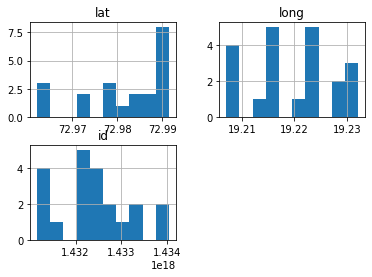

In [ ]:
df[['lat','long','id']].hist()

In [ ]:
df.loc[df['long']==df['long'].value_counts().index[0]]

,tweet_dt,id,lat,long,username,name,tweet,geo
8,2021-08-30,1432406283056033794,72.989216,19.215858,propertiesindia,PropertyWala.com,"Presenting LODHA CROWN by LODHA GROUP, #Thane....",True
9,2021-08-30,1432403005597487106,72.989216,19.215858,propertiesindia,PropertyWala.com,"Crown #Thane by Lodha Group, #Majiwada Junctio...",True
18,2021-08-27,1431318912973561866,72.989216,19.215858,propertiesindia,PropertyWala.com,#2BHK Available on Rent in Lodha Luxuria Priva...,True
